In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath = '/content/drive/MyDrive/ML/Ammo_spaceship/train.csv'
df = pd.read_csv(filepath)

In [ ]:
filepath = '/content/drive/MyDrive/ML/Ammo_spaceship/test.csv'
df_test = pd.read_csv(filepath)

In [ ]:
df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
3409,3671_01,Earth,False,E/246/S,TRAPPIST-1e,50.0,False,43.0,661.0,1.0,85.0,0.0,Deany Avidson,False
2845,3070_01,Earth,True,G/501/P,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,0.0,0.0,Bel Haydenez,True
971,1030_01,Earth,False,F/213/P,TRAPPIST-1e,23.0,False,1081.0,0.0,0.0,0.0,7.0,Jorgie Farleyatton,False
133,0144_01,Earth,False,F/31/S,TRAPPIST-1e,20.0,False,0.0,420.0,210.0,0.0,0.0,Guadae Dayers,True
4257,4532_01,Earth,True,G/739/S,TRAPPIST-1e,30.0,False,0.0,0.0,0.0,0.0,0.0,Lynez Serraynardy,True


In [ ]:
df_test.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
1616,3493_01,Earth,False,F/721/P,TRAPPIST-1e,32.0,False,0.0,1001.0,8.0,0.0,0.0,Eulah Brownings
3572,7792_01,Europa,True,B/302/S,55 Cancri e,30.0,NaN,0.0,0.0,0.0,NaN,0.0,Sadalm Unsible
1064,2245_02,Europa,True,A/17/P,TRAPPIST-1e,45.0,True,0.0,0.0,0.0,0.0,0.0,Izares Hyling
2840,6267_04,Europa,True,B/214/P,55 Cancri e,38.0,False,0.0,0.0,0.0,0.0,0.0,Naslon Dianket
848,1751_02,Mars,False,F/332/S,TRAPPIST-1e,3.0,False,0.0,0.0,0.0,0.0,0.0,Weer Chate


In [ ]:
df_test.shape

(4277, 13)

In [ ]:
for col in df.columns:
  print(col,df[col].nunique())

PassengerId 8693
HomePlanet 3
CryoSleep 2
Cabin 6560
Destination 3
Age 80
VIP 2
RoomService 1273
FoodCourt 1507
ShoppingMall 1115
Spa 1327
VRDeck 1306
Name 8473
Transported 2


In [ ]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [ ]:
df['VIP'].unique()

array([False, True, nan], dtype=object)

In [ ]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [ ]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [ ]:

null_percentage = df.isnull().mean() * 100

print(null_percentage)


PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


In [ ]:
# since very less data is missing, lets drop all the null values
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [ ]:
#what's there in foodcourt col
df['FoodCourt'].unique()[:10]

array([0.000e+00, 9.000e+00, 3.576e+03, 1.283e+03, 7.000e+01, 4.830e+02,
       1.539e+03, 7.850e+02, 7.295e+03, 1.000e+00])

In [ ]:
# drpping cols not useful for prediction
df1 = df
waste_cols = ['PassengerId','Name','Cabin']
df1.drop(waste_cols,axis=1,inplace=True)

In [ ]:
df1.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
label_encoder = LabelEncoder()
# Fit and transform the column
df1['CryoSleep'] = label_encoder.fit_transform(df['CryoSleep'])
df1['HomePlanet'] = label_encoder.fit_transform(df['HomePlanet'])
df1['Destination'] = label_encoder.fit_transform(df['Destination'])
df1['VIP'] = label_encoder.fit_transform(df['VIP'])
df1['Transported'] = label_encoder.fit_transform(df['Transported'])


In [ ]:
df1.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


#### 0 - earth ; 1 - Europa ; 2 - Mars


### Univariate Analysis

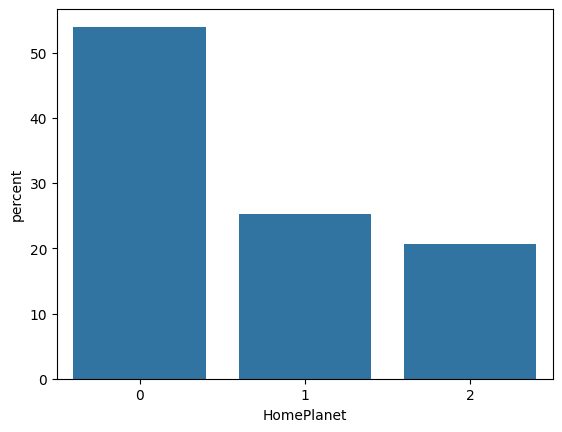

In [ ]:
sns.countplot(data=df1, x='HomePlanet', stat='percent')
plt.show()


In [ ]:
df1['HomePlanet'].value_counts()

,count
HomePlanet,
0,3566
1,1673
2,1367


##### More than 55% are from earth; 25% are from europa; 20% are from mars

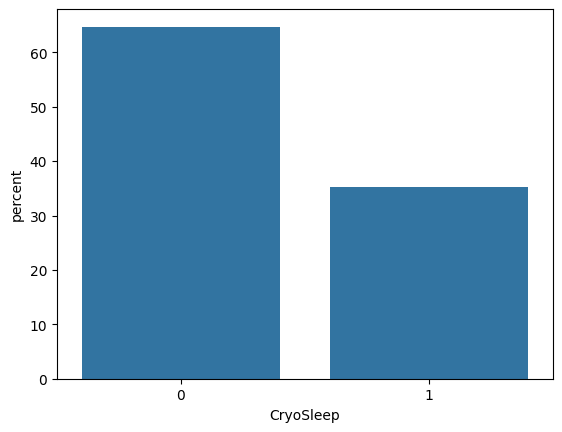

In [ ]:
sns.countplot(data=df1, x='CryoSleep', stat='percent')
plt.show()

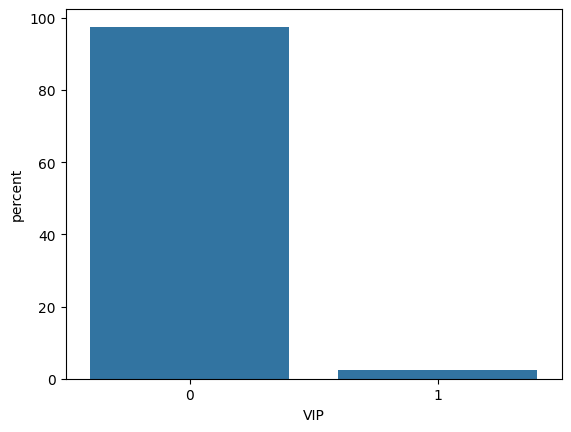

In [ ]:
sns.countplot(data=df1, x='VIP', stat='percent')
plt.show()

In [ ]:
df1['VIP'].value_counts()

,count
VIP,
0,6444
1,162


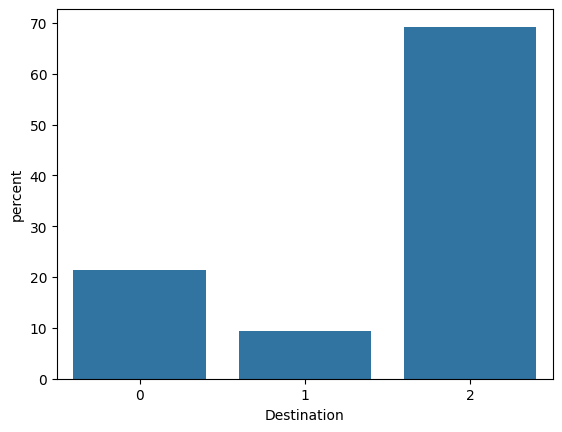

In [ ]:
sns.countplot(data=df1, x='Destination', stat='percent')
plt.show()

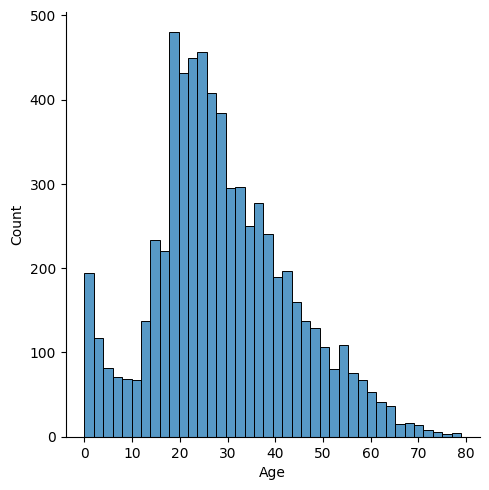

In [ ]:
# lets see the age distribution
sns.displot(df1['Age'])
plt.show()

#### Thare are so many people around 20 and 30. Let's make age groups to get better idea


In [ ]:
# making bins to get age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
age_groups = pd.cut(df1['Age'], bins=bins, labels=labels)

In [ ]:
df1['age_groups'] = age_groups

In [ ]:
df1.sample(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,age_groups
4961,0,0,0,27.0,0,3905.0,7.0,0.0,4.0,53.0,0,20-30
6005,0,0,2,25.0,0,106.0,0.0,0.0,0.0,925.0,0,20-30
6850,2,0,2,18.0,0,49.0,0.0,2885.0,1.0,0.0,1,10-20
6588,1,0,2,37.0,0,26.0,2898.0,9.0,0.0,40.0,1,30-40
8020,0,0,2,22.0,0,4.0,0.0,72.0,21.0,600.0,0,20-30


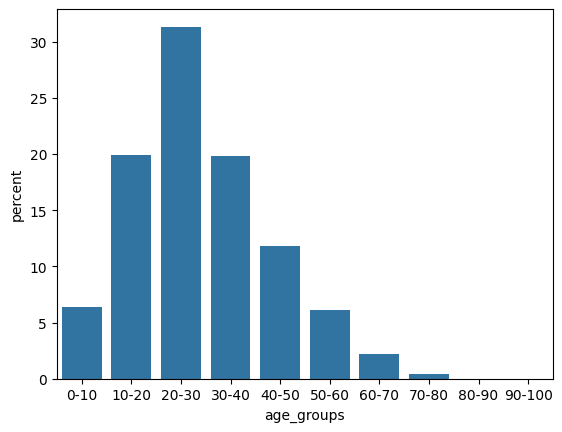

In [ ]:
# age group stat
sns.countplot(data=df1, x='age_groups', stat='percent')
plt.show()

### Bivariate Analysis

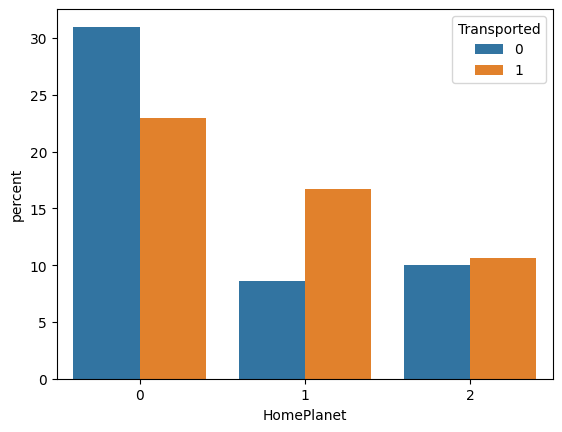

In [ ]:
# How many from earth and mars transported
sns.countplot(data=df1, x='HomePlanet', hue='Transported', stat='percent')
plt.show()

#### People from earth did not get transported and most of the people from europa got transported. Almost same amout of people did and didnot get transported


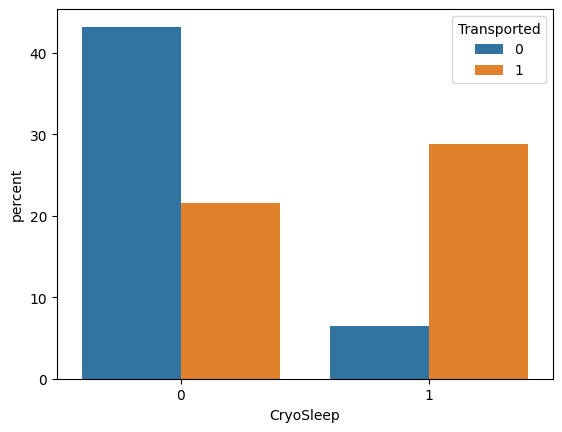

In [ ]:
sns.countplot(data=df1, x='CryoSleep', hue='Transported', stat='percent')
plt.show()

Most of the people who are in cryosleep are transported

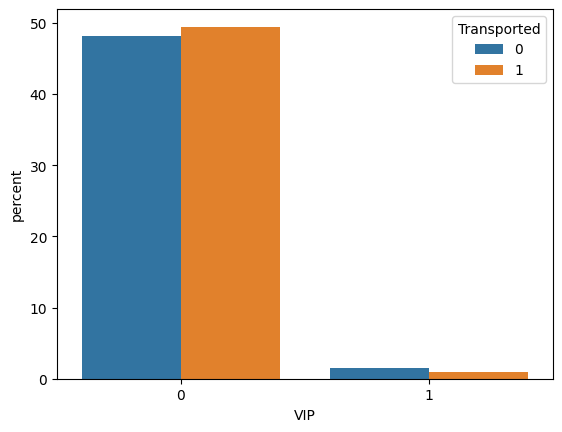

In [ ]:
sns.countplot(data=df1, x='VIP', hue='Transported', stat='percent')
plt.show()

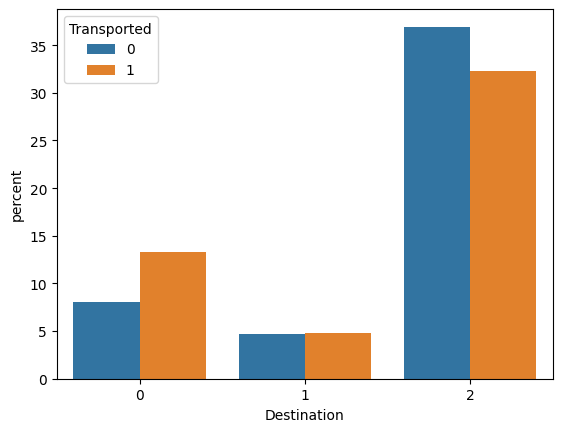

In [ ]:
sns.countplot(data=df1, x='Destination', hue='Transported', stat='percent')
plt.show()

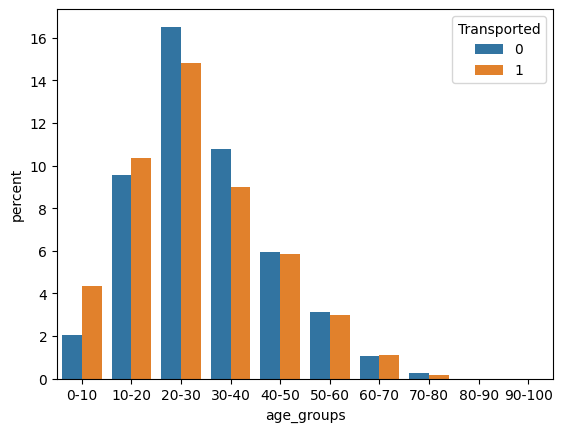

In [ ]:
sns.countplot(data=df1, x='age_groups', hue='Transported', stat='percent')
plt.show()

In [ ]:
waste_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df1.drop(waste_cols,axis=1,inplace=True)

In [ ]:
df1.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,age_groups
0,1,0,2,39.0,0,0,30-40
1,0,0,2,24.0,0,1,20-30
2,1,0,2,58.0,1,0,50-60
3,1,0,2,33.0,0,0,30-40
4,0,0,2,16.0,0,1,10-20


In [ ]:
df1['age_groups'].isnull().sum()

140

In [ ]:
df2 = df1[df1['age_groups'].isnull()]
df2

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,age_groups
19,0,0,2,0.0,0,1,NaN
61,0,1,1,0.0,0,1,NaN
157,0,0,2,0.0,0,0,NaN
171,2,0,2,0.0,0,1,NaN
197,0,0,2,0.0,0,1,NaN
...,...,...,...,...,...,...,...
8440,0,0,0,0.0,0,1,NaN
8584,0,1,2,0.0,0,1,NaN
8650,0,1,2,0.0,0,1,NaN
8654,2,0,2,0.0,0,1,NaN


In [ ]:
# replacing the age 0 with 0-10 age_group
df1['age_groups'].fillna('0-10',inplace=True)

### Multivariate Analysis

In [ ]:
df1.dtypes

,0
HomePlanet,int64
CryoSleep,int64
Destination,int64
Age,float64
VIP,int64
Transported,int64
age_groups,category


In [ ]:
df1.drop('age_groups',axis=1,inplace=True)

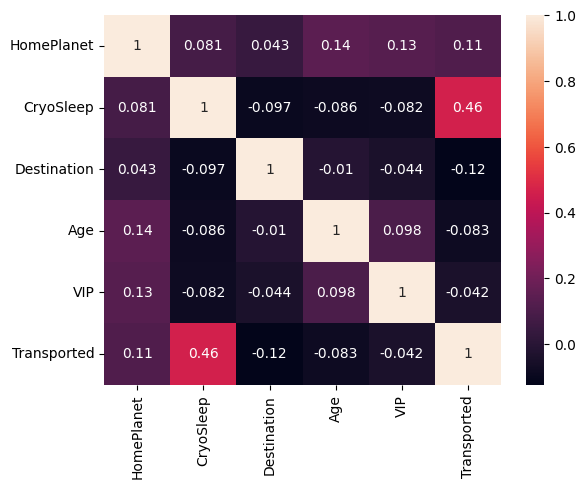

In [ ]:
# make a heat map
sns.heatmap(df1.corr(), annot=True)
plt.show()



1.   Cryo sleep is extremely important
2.   Home planet is also important
3.   Destination,VIP,Age are not that important

But lets keep all the columns for now



## Clean the TEST data

In [ ]:
# Make sure that you clean and encode in the similar way as that of train data
df_test.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4026,8765_01,Mars,False,F/1698/S,TRAPPIST-1e,35.0,False,3529.0,0.0,2142.0,0.0,0.0,Eggies Laai
3876,8464_01,Mars,False,F/1631/S,TRAPPIST-1e,40.0,False,2249.0,4.0,345.0,0.0,0.0,Ale Moncy
1305,2794_07,Mars,True,F/579/P,TRAPPIST-1e,18.0,False,0.0,0.0,0.0,0.0,0.0,Dooss Apie
2573,5632_01,Europa,True,C/177/P,TRAPPIST-1e,44.0,False,0.0,0.0,0.0,0.0,0.0,Altairk Ranicood
513,1092_01,Earth,True,G/167/P,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,Dianya Mcleandez


In [ ]:
waste_cols = ['Name','Cabin','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
df_test.drop(waste_cols,axis=1,inplace=True)

In [ ]:
pass_id = df_test['PassengerId']
df_test = df_test.drop(['PassengerId'], axis=1)
df_test

,HomePlanet,CryoSleep,Destination,Age,VIP
0,Earth,True,TRAPPIST-1e,27.0,False
1,Earth,False,TRAPPIST-1e,19.0,False
2,Europa,True,55 Cancri e,31.0,False
3,Europa,False,TRAPPIST-1e,38.0,False
4,Earth,False,TRAPPIST-1e,20.0,False
...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False
4273,Earth,False,TRAPPIST-1e,42.0,False
4274,Mars,True,55 Cancri e,NaN,False
4275,Europa,False,NaN,NaN,False


In [ ]:
df_test.sample(5)

,HomePlanet,CryoSleep,Destination,Age,VIP
2933,Earth,False,TRAPPIST-1e,18.0,False
986,Mars,True,TRAPPIST-1e,29.0,False
3078,Earth,False,55 Cancri e,38.0,False
3965,Earth,False,PSO J318.5-22,3.0,False
1982,Earth,False,55 Cancri e,43.0,False


In [ ]:
df_test.isnull().sum()

,0
HomePlanet,87
CryoSleep,93
Destination,92
Age,91
VIP,93


In [ ]:
df_test.isnull().mean()*100

,0
HomePlanet,2.034136
CryoSleep,2.174421
Destination,2.151040
Age,2.127660
VIP,2.174421


In [ ]:
# since there very less % of data missing, drop those null values
cols = df_test.columns
for col in cols:
  df_test[col].fillna(df_test[col].mode()[0],inplace=True)


In [ ]:
df_test.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0


#### Encoding in test data

In [ ]:
df_test['HomePlanet'].unique()

array(['Earth', 'Europa', 'Mars'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_test['CryoSleep'] = label_encoder.fit_transform(df_test['CryoSleep'])
df_test['HomePlanet'] = label_encoder.fit_transform(df_test['HomePlanet'])
df_test['Destination'] = label_encoder.fit_transform(df_test['Destination'])
df_test['VIP'] = label_encoder.fit_transform(df_test['VIP'])

In [ ]:
df_test.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP
0,0,1,2,27.0,0
1,0,0,2,19.0,0
2,1,1,0,31.0,0
3,1,0,2,38.0,0
4,0,0,2,20.0,0


### Model Building and training

In [ ]:
# use logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# split the data into train and test data
y = df1['Transported']
x = df1.drop('Transported',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

x_train.iloc[:,:] = Scaler.fit_transform(x_train.iloc[:,:])
x_test.iloc[:,:]  = Scaler.fit_transform(x_test.iloc[:,:])
df_test = Scaler.fit_transform(df_test)

print("X: ",x_train.shape,x_test.shape)
print("Y: ",y_train.shape,y_test.shape)
print("test_X: ",df_test)

X:  (4624, 5) (1982, 5)
Y:  (4624,) (1982,)
test_X:  [[-0.8241071   1.33044268  0.60356257 -0.10144546 -0.13268938]
 [-0.8241071  -0.75162953  0.60356257 -0.6684265  -0.13268938]
 [ 0.41176459  1.33044268 -1.89057957  0.18204506 -0.13268938]
 ...
 [ 1.64763628  1.33044268 -1.89057957 -0.73929913 -0.13268938]
 [ 0.41176459 -0.75162953  0.60356257 -0.73929913 -0.13268938]
 [-0.8241071   1.33044268 -0.6435085   1.03251661 -0.13268938]]


In [ ]:
# Building model and training model
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

### Prediction and Evaluation

In [ ]:
y_pred = model.predict(x_train)
y_pred_test = model.predict(x_test)


In [ ]:
accuracy_score(y_train,y_pred)

0.7136678200692042

In [ ]:
accuracy_score(y_test,y_pred_test)

0.7285570131180625

In [ ]:
df_test.shape

(4277, 5)

In [ ]:
pred = model.predict(df_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
pred.shape

(4277,)

In [ ]:
pred_df = pd.DataFrame({
    'PassengerId':pass_id,
    'Transported':pred
})

In [ ]:
pred_df['Transported'] = pred_df['Transported'].replace({0: False, 1: True})

In [ ]:
pred_df.to_csv('prediction2.csv',index=False)